In [44]:
import numpy as np
import matplotlib.pyplot as plt

from linear_models.least_squares import MatrixLeastSquaresRegression as least_squares

# Least Squares Regression - The Normal Equation

Least Squares Regression is a method for estimating the coefficients of a linear regression model. The aim is to find the best-fit line through a set of data points by minimizing the sum of the squares of the vertical distances of the points from the line. 

The formula for the regression line is given by:

\[ Y = X\beta \]

where:

- \( Y \) is the dependent variable,
- \( X \) is the matrix of independent variables,
- \( \beta \) is the vector of regression coefficients.

The Normal Equation, which is used to solve for \( \beta \), is given by:

\[ \beta = (X^TX)^{-1}X^TY \]

where:

- \( X^T \) is the transpose of matrix \( X \),
- \( (X^TX)^{-1} \) is the inverse of matrix \( X^TX \).

To compute \( \beta \) using the Normal Equation, follow these steps:

1. Transpose the matrix \( X \) to get \( X^T \).
2. Multiply \( X^T \) with \( X \) to get \( X^TX \).
3. Compute the inverse of \( X^TX \).
4. Multiply the result with \( X^T \) and then with \( Y \) to get \( \beta \).

It's important to note that this method requires the matrix \( X^TX \) to be invertible. If \( X^TX \) is singular (not invertible) or nearly singular, the Normal Equation may not perform well. In such cases, alternative methods like Gradient Descent or regularization techniques might be more appropriate.


# Univariate Least Squares Regression

In [2]:
# CONSTRUCTING X
feature_1 = np.array([3, 4, 1, 0])
ones = np.ones(
    len(feature_1)
)  # Adds a column of ones in order to calculate the intercept
X = np.column_stack([ones, feature_1])
X

array([[1., 3.],
       [1., 4.],
       [1., 1.],
       [1., 0.]])

In [3]:
# CONSTRUCTING Y
target = np.array([1, 2, 3, 4])
Y = target.reshape(-1, 1)  # Here, the .T notation does not work

In [4]:
Y

array([[1],
       [2],
       [3],
       [4]])

In [5]:
X.T @ X  # Calculating X's dot product

array([[ 4.,  8.],
       [ 8., 26.]])

In [6]:
np.linalg.inv(X.T @ X)

array([[ 0.65, -0.2 ],
       [-0.2 ,  0.1 ]])

In [7]:
np.linalg.inv(X.T @ X) @ X.T @ Y

array([[ 3.7],
       [-0.6]])

In [8]:
beta = np.linalg.inv(X.T @ X) @ X.T @ Y
beta

array([[ 3.7],
       [-0.6]])

In [9]:
Y_hat = X @ beta
Y_hat

array([[1.9],
       [1.3],
       [3.1],
       [3.7]])

In [69]:
int(Y_hat[0, 0])

1

In [63]:
beta

array([[ 3.7],
       [-0.6]])

In [64]:
beta[1, 0]

-0.6000000000000001

In [12]:
beta[0]

array([3.7])

In [43]:
a = 1
b = 2
test = np.column_stack([a, b]).T
test

array([[1],
       [2]])

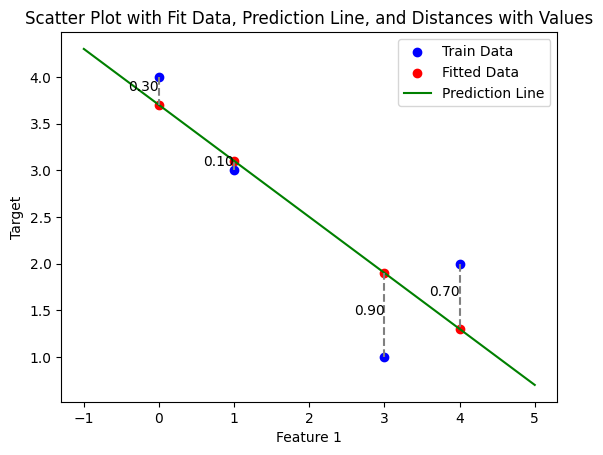

In [13]:
fig, ax = plt.subplots()

ax.scatter(feature_1, target, color="blue", label="Train Data")

ax.scatter(feature_1, Y_hat, color="red", label="Fitted Data")

x_vals = np.linspace(min(feature_1) - 1, max(feature_1) + 1, 100)
y_vals = beta[0] + beta[1] * x_vals
ax.plot(x_vals, y_vals, color="green", label="Prediction Line")

for xi, yi, yhati in zip(feature_1, target, Y_hat.flatten()):
    line = ax.plot([xi, xi], [yi, yhati], color="gray", linestyle="--")
    distance = np.abs(yi - yhati)
    ax.text(xi, (yi + yhati) / 2, f"{distance:.2f}", ha="right")

ax.set_xlabel("Feature 1")
ax.set_ylabel("Target")
ax.set_title("Scatter Plot with Fit Data, Prediction Line, and Distances with Values")
ax.legend()

# Show the plot with distances values
plt.show()

# Bivariate 

In [71]:
# CONSTRUCTING X
feature_1 = np.array([3, 4, 1, 0])
feature_2 = np.array([9, 16, 1, 0])
feature_3 = np.array([8, 1, 10, 4])

X = np.column_stack([feature_1])

# CONSTRUCTING Y
target = np.array([1, 2, 3, 4])
Y = target.reshape(-1, 1)  # Here, the .T notation does not work

In [46]:
np.linalg.inv(X.T @ X)

array([[ 8.47698882, -2.12491782, -0.62919132],
       [-2.12491782,  0.53616042,  0.15581854],
       [-0.62919132,  0.15581854,  0.05325444]])

In [72]:
model = least_squares()
results = model.fit(x=X, y=Y)

In [111]:
test = results.predict(X)
[arr[0] for arr in test][0]

1.9